In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
from keras.models import Sequential

Using TensorFlow backend.


In [8]:
from keras.layers import Dense

In [9]:
from keras.layers import LSTM

In [10]:
from keras.layers import Dropout

In [11]:
df = pd.read_csv("AirPassengers.csv")

In [12]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [13]:
df.Month.dtype

dtype('O')

In [14]:
# In time series we need to convert month or data of object datatype into datetime datatype

In [15]:
df.Month = pd.to_datetime(df.Month)

In [16]:
df.Month

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [17]:
df.Month.dtype

dtype('<M8[ns]')

In [18]:
# In time we need to set Month or date column as Index first

In [19]:
df = df.set_index('Month')

In [20]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [21]:
df[:-12]

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [22]:
df[-12:]

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [23]:
# Now doing train/test split

In [24]:
# We'll train upto lastyear(upto 1 year back) and test on last year

In [25]:
# Means dataset is upto year 1960 so we'll train upto 1959 and test on 1960

In [26]:
train, test = df[:-12], df[-12:]

In [27]:
# Now scaling the data

In [28]:
scaler  = MinMaxScaler()

In [29]:
train = scaler.fit_transform(train)

In [30]:
test = scaler.transform(test)

In [31]:
train

array([[0.01758242],
       [0.03076923],
       [0.06153846],
       [0.05494505],
       [0.03736264],
       [0.06813187],
       [0.0967033 ],
       [0.0967033 ],
       [0.07032967],
       [0.03296703],
       [0.        ],
       [0.03076923],
       [0.02417582],
       [0.04835165],
       [0.08131868],
       [0.06813187],
       [0.04615385],
       [0.0989011 ],
       [0.14505495],
       [0.14505495],
       [0.11868132],
       [0.06373626],
       [0.02197802],
       [0.07912088],
       [0.09010989],
       [0.1010989 ],
       [0.16263736],
       [0.12967033],
       [0.14945055],
       [0.16263736],
       [0.20879121],
       [0.20879121],
       [0.17582418],
       [0.12747253],
       [0.09230769],
       [0.13626374],
       [0.14725275],
       [0.16703297],
       [0.1956044 ],
       [0.16923077],
       [0.17362637],
       [0.25054945],
       [0.27692308],
       [0.3032967 ],
       [0.23076923],
       [0.19120879],
       [0.14945055],
       [0.197

In [32]:
test

array([[0.68791209],
       [0.63076923],
       [0.69230769],
       [0.78461538],
       [0.80879121],
       [0.94725275],
       [1.13846154],
       [1.1032967 ],
       [0.88791209],
       [0.78461538],
       [0.62857143],
       [0.72087912]])

In [33]:
# creating a time series generator

In [34]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [36]:
# Creating Model

In [37]:
model = Sequential()

In [38]:
model.add(LSTM(200, activation='relu', input_shape= (n_input, n_features)))

In [39]:
# Dropout layer prevents overfitting we are taking dropout rate - 15%
model.add(Dropout(0.15))

In [40]:
model.add(Dense(1))

In [41]:
model.compile(optimizer='adam', loss='mse')


In [43]:
model.fit_generator(generator, epochs=180)

Epoch 1/180
20/20 [==============================] - 4s 222ms/step - loss: 0.0621
Epoch 2/180
20/20 [==============================] - 1s 27ms/step - loss: 0.0186
Epoch 3/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0106
Epoch 4/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0103
Epoch 5/180
20/20 [==============================] - 1s 29ms/step - loss: 0.0099
Epoch 6/180
20/20 [==============================] - 1s 29ms/step - loss: 0.0106
Epoch 7/180
20/20 [==============================] - 1s 29ms/step - loss: 0.0125
Epoch 8/180
20/20 [==============================] - 1s 29ms/step - loss: 0.0103: 0s - loss: 0.0
Epoch 9/180
20/20 [==============================] - 1s 29ms/step - loss: 0.0094
Epoch 10/180
20/20 [==============================] - 1s 30ms/step - loss: 0.0091: 0s - loss: 0.
Epoch 11/180
20/20 [==============================] - 1s 37ms/step - loss: 0.0113
Epoch 12/180
20/20 [==============================] - 1s 38ms/step - loss: 

20/20 [==============================] - 1s 30ms/step - loss: 0.0020A: 0s - loss: 0
Epoch 100/180
20/20 [==============================] - 1s 31ms/step - loss: 0.0035
Epoch 101/180
20/20 [==============================] - 1s 32ms/step - loss: 0.0021
Epoch 102/180
20/20 [==============================] - 1s 33ms/step - loss: 0.0030
Epoch 103/180
20/20 [==============================] - 1s 30ms/step - loss: 0.0043
Epoch 104/180
20/20 [==============================] - 1s 29ms/step - loss: 0.0031
Epoch 105/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0026
Epoch 106/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0042
Epoch 107/180
20/20 [==============================] - 1s 28ms/step - loss: 0.0048
Epoch 108/180
20/20 [==============================] - 1s 25ms/step - loss: 0.0027
Epoch 109/180
20/20 [==============================] - 0s 25ms/step - loss: 0.0024
Epoch 110/180
20/20 [==============================] - 0s 25ms/step - loss: 0.0017
Epo

In [44]:
# Making Predictions

In [56]:
# creating list where we can hold our predictions 
pred_list = []
# creating batches(of 12) for prediction
# first creating last batch from train to predict the first batch of test
# Also converting 2d array to 3d array in batch cz we are going to predict 1 by 1 (i.e by each month)
batch = train[-n_input:].reshape((1, n_input, n_features))

# Running for loop to append each month prediction to predicition list
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
# Appending the remaining I/P data excluding the previous month
# Instead of that appneding predicted data of previous month
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)
    

In [60]:
batch

array([[[0.65302944],
        [0.6649068 ],
        [0.74526775],
        [0.76034164],
        [0.84585488],
        [1.03261662],
        [1.2171272 ],
        [1.18319881],
        [0.95732504],
        [0.80137193],
        [0.73887557],
        [0.77024537]]])

In [61]:
test

array([[0.68791209],
       [0.63076923],
       [0.69230769],
       [0.78461538],
       [0.80879121],
       [0.94725275],
       [1.13846154],
       [1.1032967 ],
       [0.88791209],
       [0.78461538],
       [0.62857143],
       [0.72087912]])

In [62]:
# Now lets concatenate only test predictions to whole dataframe

In [66]:
# .index is used to assign the index of last year
prediction_df = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

In [67]:
prediction_df

,Predictions
Month,
1960-01-01,401.128396
1960-02-01,406.532594
1960-03-01,443.096826
1960-04-01,449.955448
1960-05-01,488.863970
1960-06-01,573.840560
1960-07-01,657.792878
1960-08-01,642.355458
1960-09-01,539.582894


In [69]:
df_test = pd.concat([df, prediction_df], axis=1)

In [71]:
df_test.tail()

,#Passengers,Predictions
Month,,
1960-08-01,606,642.355458
1960-09-01,508,539.582894
1960-10-01,461,468.624229
1960-11-01,390,440.188383
1960-12-01,432,454.461645


c:\users\my\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


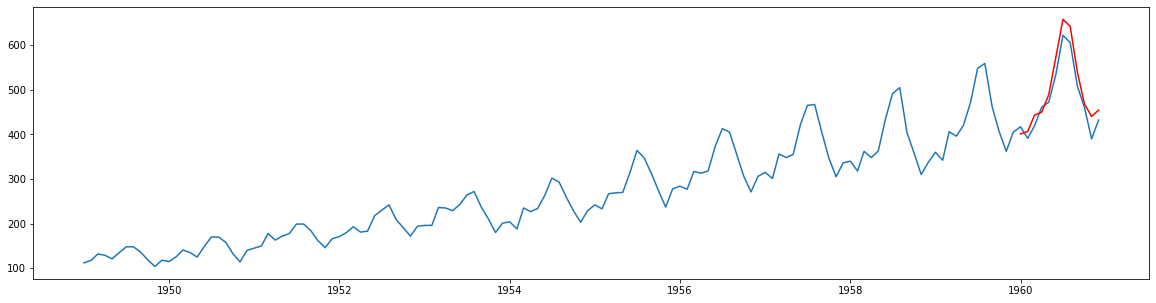

In [72]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['#Passengers'])
plt.plot(df_test.index, df_test['Predictions'], color='r')
plt.show()

In [73]:
# Now let's predict the future outcomes

In [74]:
# We'll make the whole data as training set so that we can predict future outcomes as test

In [75]:
train = df

In [76]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [77]:
train = scaler.fit_transform(train)

In [ ]:
# Creating timeseries generator for previous predictions and feed them as Input for future outcome

In [79]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [ ]:
# We dont need ro create layers of Neural Network again its already created

In [80]:
model.fit_generator(generator, epochs=180)

Epoch 1/180
22/22 [==============================] - 2s 106ms/step - loss: 0.0014
Epoch 2/180
22/22 [==============================] - 1s 42ms/step - loss: 0.0012
Epoch 3/180
22/22 [==============================] - 1s 34ms/step - loss: 0.0018
Epoch 4/180
22/22 [==============================] - 1s 37ms/step - loss: 0.0022
Epoch 5/180
22/22 [==============================] - 1s 32ms/step - loss: 0.0015
Epoch 6/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0014
Epoch 7/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0017
Epoch 8/180
22/22 [==============================] - 1s 31ms/step - loss: 0.0017
Epoch 9/180
22/22 [==============================] - 1s 31ms/step - loss: 0.0018
Epoch 10/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0014
Epoch 11/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0016 ETA: 0s - loss: 
Epoch 12/180
22/22 [==============================] - 1s 32ms/step - loss: 0.0027
Epoch 1

22/22 [==============================] - 1s 29ms/step - loss: 0.0012
Epoch 100/180
22/22 [==============================] - 1s 27ms/step - loss: 0.0012
Epoch 101/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 102/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0012
Epoch 103/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0014
Epoch 104/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0010
Epoch 105/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0013
Epoch 106/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0014
Epoch 107/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0015
Epoch 108/180
22/22 [==============================] - 1s 29ms/step - loss: 0.0015
Epoch 109/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0011 ETA: 0s - loss: 7.044
Epoch 110/180
22/22 [==============================] - 1s 28ms/step - loss: 0.0

In [81]:
# creating list where we can hold our predictions 
pred_list = []
# creating batches(of 12) for prediction
# first creating last batch from train to predict the first batch of test
# Also converting 2d array to 3d array in batch cz we are going to predict 1 by 1 (i.e by each month)
batch = train[-n_input:].reshape((1, n_input, n_features))

# Running for loop to append each month prediction to predicition list
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
# Appending the remaining I/P data excluding the previous month
# Instead of that appneding predicted data of previous month
    batch = np.append(batch[:, 1:, :], [[pred_list[i]]], axis=1)
    

In [82]:
# Creating future dates after 1960

In [83]:
from pandas.tseries.offsets import DateOffset

In [85]:
df.index[-1]

Timestamp('1960-12-01 00:00:00')

In [ ]:
# We can also get future years by "+ DateOffset(years=x)"

In [86]:
add_dates = [df.index[-1] + DateOffset(months=x)for x in range(0, 13)] 

In [87]:
add_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00')]

In [88]:
# Creatin dataframe of future dates excluding the firstone(of 1960)

In [89]:
future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [90]:
future_dates

,#Passengers
1961-01-01,NaN
1961-02-01,NaN
1961-03-01,NaN
1961-04-01,NaN
1961-05-01,NaN
1961-06-01,NaN
1961-07-01,NaN
1961-08-01,NaN
1961-09-01,NaN
1961-10-01,NaN


In [91]:
# Let's predict the values

In [92]:
prediction_df = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['Predictions'])

In [93]:
prediction_df

,Predictions
1961-01-01,424.533051
1961-02-01,410.713555
1961-03-01,434.772442
1961-04-01,468.451920
1961-05-01,497.796889
1961-06-01,582.468004
1961-07-01,657.600842
1961-08-01,624.073208
1961-09-01,531.360028
1961-10-01,464.727567


In [94]:
df_future_test = pd.concat([df, prediction_df], axis=1)

In [96]:
df_future_test.tail(12)

,#Passengers,Predictions
1961-01-01,NaN,424.533051
1961-02-01,NaN,410.713555
1961-03-01,NaN,434.772442
1961-04-01,NaN,468.451920
1961-05-01,NaN,497.796889
1961-06-01,NaN,582.468004
1961-07-01,NaN,657.600842
1961-08-01,NaN,624.073208
1961-09-01,NaN,531.360028
1961-10-01,NaN,464.727567


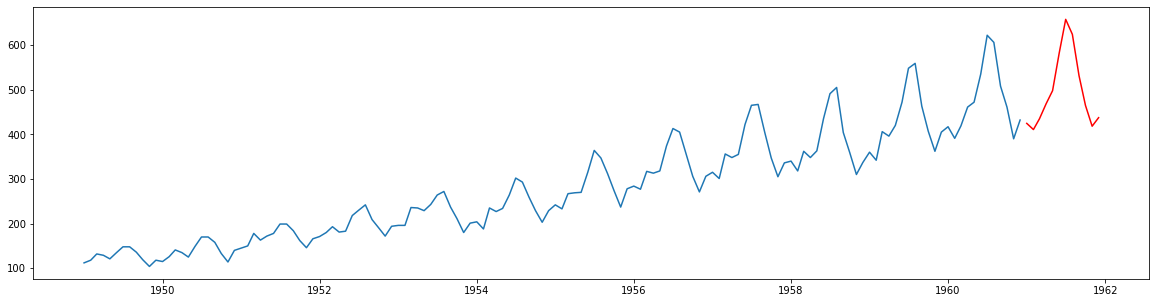

In [101]:
plt.figure(figsize=(20, 5))
plt.plot(df_future_test.index, df_future_test['#Passengers'])
plt.plot(df_future_test.index, df_future_test['Predictions'], color='r')
plt.show()